<a href="https://colab.research.google.com/github/AldrichMendes/Image-Classification-Using-Machine-Learning/blob/main/Image_Classification_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini Project: Image Classification Using Machine Learning By Aldrich Mendes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
%ls /content/drive/MyDrive/Aldrich_Mendes/Mini_Project/images

 motorcycle/  'soccer ball'/   watermelon/


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

In [ ]:
target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/Aldrich_Mendes/Mini_Project/images'
CATEGORIES = ['motorcycle','soccer ball','watermelon']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) 
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) 
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
length = flat_data[0]
length

array([0.64705882, 0.65882353, 0.66667137, ..., 0.52619608, 0.5254902 ,
       0.5254902 ])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<BarContainer object of 3 artists>

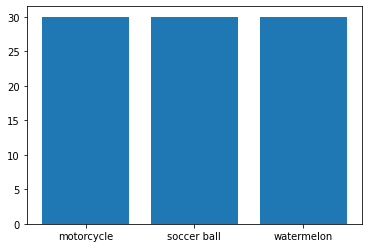

In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2,
       2, 0, 2, 0, 1])

In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.8518518518518519

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 7,  0,  1],
       [ 0, 10,  1],
       [ 1,  1,  6]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URL Of The New Image: https://images.unsplash.com/photo-1563015181-85d2e7c46e20?ixid=MnwxMjA3fDB8MHxzZWFyY2h8OHx8d2F0ZXJtZWxvbnxlbnwwfHwwfHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60
(500, 500, 3)
 PREDICTED OUTPUT: watermelon


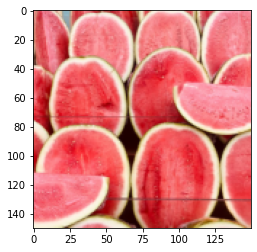

In [ ]:
# Testing new images from the internet, which aren't part of The Dataset
flat_data = []
url = input('Enter your URL Of The New Image: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Enter your URL Of The New Image: https://images.unsplash.com/photo-1554288270-434857b05234?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8NDN8fHxlbnwwfHx8fA%3D%3D&auto=format&fit=crop&w=500&q=60
(400, 500, 3)
 PREDICTED OUTPUT: motorcycle


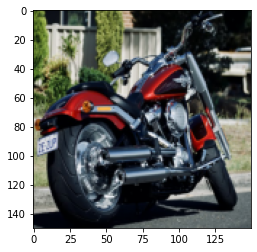

In [ ]:
# Testing new images from the internet, which aren't part of The Dataset
flat_data = []
url = input('Enter your URL Of The New Image: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Enter your URL Of The New Image: https://www.thestatesman.com/wp-content/uploads/2020/04/1c5b1aa3386eeb2c21d633f04e2ddfbe.jpg
(800, 1200, 3)
 PREDICTED OUTPUT: soccer ball


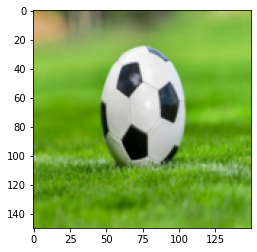

In [ ]:
# Testing new images from the internet, which aren't part of The Dataset
flat_data = []
url = input('Enter your URL Of The New Image: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 7.6MB/s 
     |████████████████████████████████| 4.2MB 51.2MB/s 
     |████████████████████████████████| 92kB 14.4MB/s 
     |████████████████████████████████| 81kB 12.0MB/s 
     |████████████████████████████████| 174kB 50.8MB/s 
     |████████████████████████████████| 112kB 51.0MB/s 
     |████████████████████████████████| 122kB 50.6MB/s 
     |████████████████████████████████| 71kB 12.9MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=5f416f09a0b488a19ee97629608673c7c9fc8f9ed8dee8b34c7e1d4763663064
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
  Found existing installat

     |████████████████████████████████| 747kB 8.6MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=c414676e87f68733b2a70f89a106cfbd70217ae551cf942a599617f939a72303
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from  PIL import Image 
st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Mini Project : Image Classifier Using Machine learning By Aldrich Mendes')
st.text('Upload the image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image..", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['motorcycle','soccer ball','watermelon']
    st.write('Result...')
    flat_data = []
    img = np.array(img) 
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT :{y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')

Writing app.py


In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://3287f1288b4d.ngrok.io" -> "http://localhost:80">